In [1]:
# Initialization of quantumState
import pennylane as qml
from pennylane import numpy as np

device = qml.device("default.qubit", wires = 3)

@qml.qnode(device)
def circuit(state = None):
    qml.StatePrep(state, wires = range(1), normalize= True)
    qml.BasisState(np.array(3), wires = range(2))
    return qml.state()


initial_state = np.array([0.5, 0.5])
state = circuit(initial_state)

In [ ]:
# Codercise 2.1
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires = 3)

@qml.qnode(dev)
def prep_circuit(alpha, beta, gamma):
    """
    Prepares the state alpha|001> + beta|010> + gamma|100>.
    Args:
    alpha, beta, gamma (np.complex): The coefficients of the quantum state
    to prepare.
    Returns:
    (np.array): The quantum state
    """
    initial_state = np.zeros(8)
    initial_state[0b001] = alpha
    initial_state[0b010] = beta
    initial_state[0b100] = gamma
    qml.StatePrep(initial_state, wires = range(3))
    
    return qml.state()

alpha, beta, gamma = 1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3),

print("The prepared state is", prep_circuit(alpha, beta, gamma))

The prepared state is [0.        +0.j 0.57735027+0.j 0.57735027+0.j 0.        +0.j
 0.57735027+0.j 0.        +0.j 0.        +0.j 0.        +0.j]


In [3]:
# Codercise 2.2
import pennylane as qml
from pennylane import numpy as np
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def single_qubit_gates(theta, phi):
    """
    Implements the quantum circuit shown in the statement
    Args:
    - theta, phi (float): The arguments for the RX and RZ gates, respectively
    Returns:
    - (np.array): The output quantum state.
    
    """

    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)
    qml.T(wires = 0)
    qml.S(wires = 1)
    qml.RX(theta, wires = 0)
    qml.RZ(phi, wires = 1)
    
    return qml.state()

theta, phi = np.pi/3, np.pi/4
print("The output state of the circuit is: ", single_qubit_gates(theta, phi))

The output state of the circuit is:  [ 0.49572243-0.39667667j -0.07003593+0.63102146j  0.30438071-0.0652631j
 -0.16908169+0.26137765j]


In [11]:
# Codercise 2.3
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires = 3)

@qml.qnode(dev)
def multi_qubit_gates(theta,phi):
    """
    Applies the circuit shown the figure above
    Args:
    theta, phi (float): parameters of the CRX and CRY gates, in that order.
    Returns:
    - (np.array): the quantum state
    """
    
    qml.Hadamard(wires = 0)
    qml.CRY(phi, wires= [0,1])
    qml.CRX(theta, wires= [1,2])
    qml.S(wires = 1)
    qml.T(wires = 2)
    qml.ctrl(qml.PauliX(wires = [2]), [0,1], [1,1])
    qml.SWAP(wires = [0,2])

    return qml.state()

theta, phi = np.pi/3, np.pi/4
print("The output state is: \n", multi_qubit_gates(theta, phi))

The output state is: 
 [0.70710678+0.j         0.65328148+0.j         0.        +0.j
 0.09567086+0.09567086j 0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.23434479j]


In [ ]:
# Codercise 2.4
import pennylane as qml
from pennylane import numpy as np
dev = qml.device("default.qubit", wires = 3)

@qml.qnode(dev)
def ctrl_circuit(theta,phi):
    """Implements the circuit shown in the Codercise statement
    Args:
        theta (float): Rotation angle for RX
        phi (float): Rotation angle for RY
    Returns:
        (numpy.array): The output state of the QNode
    """

    qml.RY(phi, wires = 0)
    qml.Hadamard(wires = 1)
    qml.RX(theta, wires = 2)
    qml.ctrl(qml.S(wires = 1), [0], [1])
    qml.ctrl(qml.T(wires=2), [1], [0])
    qml.ctrl(qml.Hadamard(wires = 0), [2], [1])

    return qml.state()

In [15]:
# Codercise 2.5
# The idea of phase kick back is something that bothers me , and hard to understand.
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def phase_kickback(matrix):
    """Applies phase kickback to a single-qubit operator whose matrix is known
    Args:S
    - matrix (numpy.array): A 2x2 matrix
    Returns:
    - (numpy.array): The output state after applying phase kickback
    """

    qml.Hadamard(wires = 0)
    qml.ControlledQubitUnitary(matrix, wires= [0,1], control_values = [1])
    qml.Hadamard(wires = 0) 

    return qml.state()

matrix = np.array([[-0.69165024-0.50339329j,  0.28335369-0.43350413j],
    [ 0.1525734 -0.4949106j , -0.82910055-0.2106588j ]])

print("The state after phase kickback is: \n" , phase_kickback(matrix))

The state after phase kickback is: 
 [ 0.15417488-0.25169664j  0.0762867 -0.2474553j   0.84582512+0.25169664j
 -0.0762867 +0.2474553j ]


In [28]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit")

def do(k):

    qml.StatePrep([1,k], wires = [0], normalize = True)

def apply(theta):

    qml.IsingXX(theta, wires = [1,2])

@qml.qnode(dev)
def do_apply_undo(k,theta):
    """
    Applies V, controlled-U, and the inverse of V
    Args: 
    - k, theta: The parameters for do and apply (V and U) respectively
    Returns:
    - (np.array): The output state of the routine
    """

    do(k)
    qml.ctrl(apply, [0], [1])(theta)
    qml.adjoint(do)(k)

    return qml.state()

k, theta = 0.5, 0.8

print("The output state is: \n", do_apply_undo(k, theta))

The output state is: 
 [ 0.9842122+0.j          0.       +0.j          0.       +0.j
  0.       -0.07788367j -0.0315756+0.j          0.       +0.j
  0.       +0.j          0.       -0.15576734j]


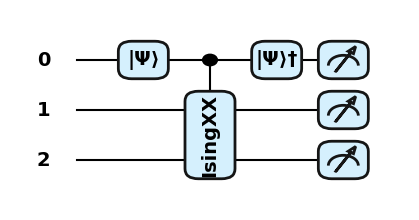

In [29]:
import matplotlib.pyplot as plt


k, theta = 0.5, 0.8
fig, ax = qml.draw_mpl(do_apply_undo, style = "pennylane")(k, theta)
fig.set_size_inches(4,2)
plt.show()